<a href="https://colab.research.google.com/github/weathon/psychology_research/blob/master/Psychology_Paper_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get The Data

In [1]:
!wget https://mdpi-res.com/d_attachment/data/data-04-00124/article_deploy/data-04-00124-s001.zip

--2022-04-29 01:31:37--  https://mdpi-res.com/d_attachment/data/data-04-00124/article_deploy/data-04-00124-s001.zip
Resolving mdpi-res.com (mdpi-res.com)... 172.67.68.164, 104.26.15.90, 104.26.14.90, ...
Connecting to mdpi-res.com (mdpi-res.com)|172.67.68.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1134038 (1.1M) [application/zip]
Saving to: ‘data-04-00124-s001.zip’

data-04-00124-s001. 100%[===================>]   1.08M  --.-KB/s    in 0.1s    

2022-04-29 01:31:38 (10.2 MB/s) - ‘data-04-00124-s001.zip’ saved [1134038/1134038]



In [2]:
!ls

data-04-00124-s001.zip	sample_data


In [ ]:
!mv data-04-00124-s001.zip data.zip
!unzip data.zip

Archive:  data.zip
  inflating: data.csv                
  inflating: Questionnaire1.pdf      
  inflating: Questionnaire2.pdf      


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DataFrame = pd.read_csv("data.csv")

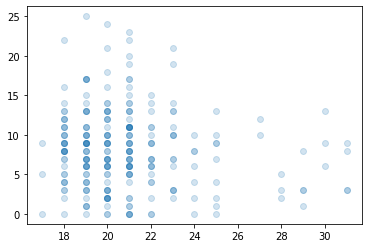

In [ ]:
age = DataFrame["Age"]
ToDep = DataFrame["ToDep"]
plt.scatter(age, ToDep, alpha=0.2)

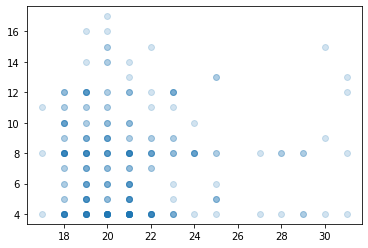

In [ ]:
age = DataFrame["Age"]
AFear = DataFrame["Afear"]
plt.scatter(age, AFear, alpha=0.2)

In [ ]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
DataFrame["Alone_bi"] = DataFrame["Alone_bi"].replace("Yes",1)
DataFrame["Alone_bi"] = DataFrame["Alone_bi"].replace("No",0)
DataFrame["Doctor_bi"] = DataFrame["Doctor_bi"].replace("Yes",1)
DataFrame["Doctor_bi"] = DataFrame["Doctor_bi"].replace("No",0)

<BarContainer object of 2 artists>

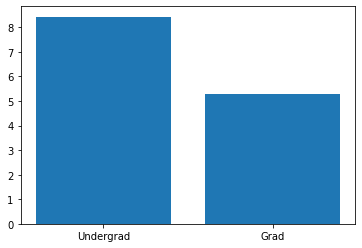

In [ ]:
y = "ToDep"
data_list = np.array([0] * int(2))
count_list = np.array([0] * int(2))
for i in DataFrame.iterrows():
#     print(i[1]["Age"])
    try:
        data_list[1 if i[1]["Academic"] == "Grad" else 0] += i[1][y]
#         age_count_list+=1
        count_list[1 if i[1]["Academic"] == "Grad" else 0] += 1
    except:
        pass
plt.bar(["Undergrad","Grad"],data_list/count_list) #ttgangcaibushizheyangde a whydoushi y

In [ ]:
under = DataFrame[DataFrame["Academic"] == "Under"]["ToDep"]
grad = DataFrame[DataFrame["Academic"] == "Grad"]["ToDep"]
# DataFrame date huangxkouxkoxukxouxkou cjhys hehsuikoukehshushsishsuishusipashouzangyahci koukeunyac

In [ ]:
grad

0       0.0
1       2.0
2       2.0
3       3.0
4       3.0
5       6.0
6       3.0
7       9.0
8       7.0
9       3.0
10      5.0
11      8.0
12      1.0
13      3.0
14      9.0
15      6.0
16      3.0
17      3.0
25     10.0
26     13.0
201    12.0
Name: ToDep, dtype: float64

In [ ]:
undererror = list(under.quantile([0.25,0.75]))
graderror = list(grad.quantile([0.25,0.75]))
y_error_max = [undererror[0], grad[0]]
y_error_min = [undererror[1], grad[1]]

In [ ]:
under.mean()

8.433198380566802

<ErrorbarContainer object of 3 artists>

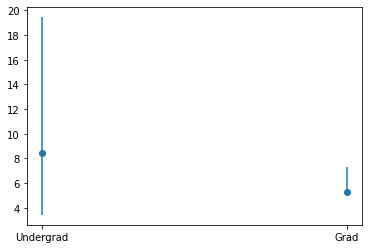

In [ ]:
plt.errorbar(["Undergrad","Grad"],[under.mean(),grad.mean()],yerr=[y_error_max,y_error_min],fmt='o')
#koukeyacihimais koukexkoukoukexkouxkoukoukeyunttyunkouke xkouyai yiwei meiyou baocnun 

In [ ]:
!pip3 install scipy #xkouciyangzhangshouzhikunyangkouke xkouyunttzhegehenbufangban 

     |████████████████████████████████| 42.1 MB 4.3 MB/s eta 0:00:01    |█▏                              | 1.6 MB 4.3 MB/s eta 0:00:10     |██████████████████████          | 29.0 MB 4.3 MB/s eta 0:00:04


In [ ]:
import scipy.stats
scipy.stats.ttest_ind(grad,under)

NameError: ignored

Ttest_indResult(statistic=0.5657051284040221, pvalue=0.5720711272952215)

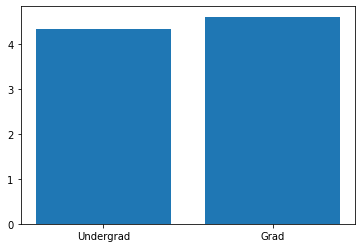

In [ ]:
under = DataFrame[DataFrame["Academic"] == "Under"]["Parents"]
grad = DataFrame[DataFrame["Academic"] == "Grad"]["Parents"] #xkoukyifanguolaixkouxkoukunkoue
plt.bar(["Undergrad","Grad"],[under.mean(),grad.mean()])
scipy.stats.ttest_ind(grad,under)

In [ ]:
DataFrame.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

In [ ]:
DataFrame["Stay_Cate"]

0       Long
1      Short
2       Long
3      Short
4      Short
       ...  
281      NaN
282      NaN
283      NaN
284      NaN
285      NaN
Name: Stay_Cate, Length: 286, dtype: object

Ttest_indResult(statistic=2.634879030643807, pvalue=0.008910439883894297)

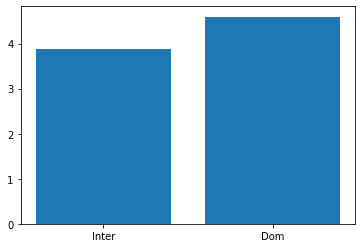

In [ ]:
inter = DataFrame[DataFrame["inter_dom"] == "Inter"]["Friends"]#fear positivekouke xkoukjchang nian zuibajki friends 
dom = DataFrame[DataFrame["inter_dom"] == "Dom"]["Friends"]
plt.bar(["Inter","Dom"],[inter.mean(),dom.mean()])
scipy.stats.ttest_ind(inter,dom)

Ttest_indResult(statistic=-2.936955840683845, pvalue=0.0036047481801401928)

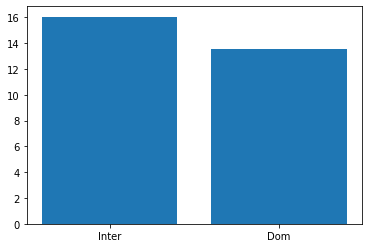

In [ ]:
under = DataFrame[DataFrame["inter_dom"] == "Inter"]["APD"]#fear positivekouke xkoukjchang nian zuibajki friends 
grad = DataFrame[DataFrame["inter_dom"] == "Dom"]["Friends"]
plt.bar(["Inter","Dom"],[under.mean(),grad.mean()])
scipy.stats.ttest_ind(grad,under)

Ttest_indResult(statistic=-1.1755076272905174, pvalue=0.2408427666237404)

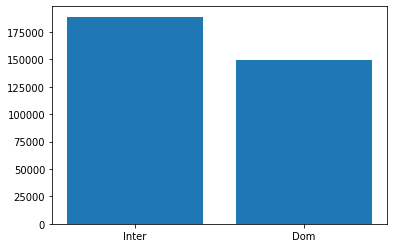

In [ ]:
under = DataFrame[DataFrame["inter_dom"] == "Inter"]["Dep"].replace("Yes",50e4).replace("No",0)
grad = DataFrame[DataFrame["inter_dom"] == "Dom"]["Dep"].replace("Yes",50e4).replace("No",0)
plt.bar(["Inter","Dom"],[under.mean(),grad.mean()])
scipy.stats.ttest_ind(grad,under)

In [ ]:
under = DataFrame[DataFrame["inter_dom"] == "Inter"]["Afear"]
grad = DataFrame[DataFrame["inter_dom"] == "Dom"]["Afear"]
plt.bar(["Inter","Dom"],[under.mean(),grad.mean()])
scipy.stats.ttest_ind(grad,under)

Ttest_indResult(statistic=2.09531155556967, pvalue=0.03708885703142386)

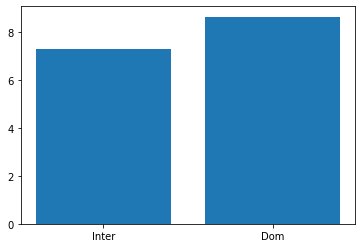

In [ ]:
#@title Default title text
under = DataFrame[DataFrame["Religion"] == "Yes"]["ToDep"]
grad = DataFrame[DataFrame["Religion"] == "No"]["ToDep"]
plt.bar(["Inter","Dom"],[under.mean(),grad.mean()])
scipy.stats.ttest_ind(grad,under)

Ttest_indResult(statistic=1.0332479444861886, pvalue=0.30320812818740955)

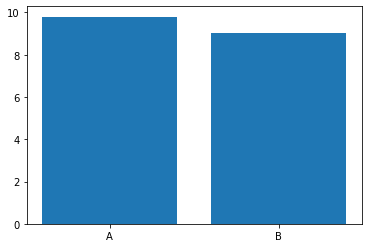

In [ ]:
A = DataFrame[DataFrame["Stay_Cate"] == "Short"]["AHome"]
B = DataFrame[DataFrame["Stay_Cate"] == "Long"]["AHome"]
plt.bar(["A","B"],[A.mean(),B.mean()])
scipy.stats.ttest_ind(A,B)

Ttest_indResult(statistic=-2.634879030643807, pvalue=0.008910439883894297)

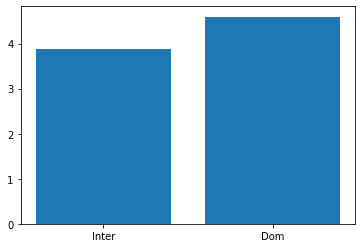

In [ ]:
inter = DataFrame[DataFrame["inter_dom"] == "Inter"]["Friends"]#fear positivekouke xkoukjchang nian zuibajki friends 
dom = DataFrame[DataFrame["inter_dom"] == "Dom"]["Friends"]
plt.bar(["Inter","Dom"],[inter.mean(),dom.mean()])
scipy.stats.ttest_ind(inter,dom)

Ttest_indResult(statistic=-1.8152329669739922, pvalue=0.07061419180901075)

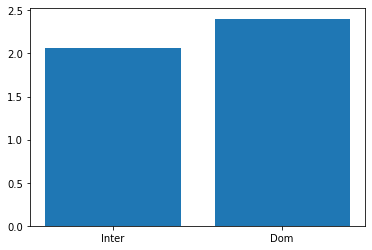

In [ ]:
inter = DataFrame[DataFrame["inter_dom"] == "Inter"]["Stay"]#fear positivekouke xkoukjchang nian zuibajki friends 
dom = DataFrame[DataFrame["inter_dom"] == "Dom"]["Stay"]
plt.bar(["Inter","Dom"],[inter.mean(),dom.mean()])
scipy.stats.ttest_ind(inter,dom)

In [ ]:
x = "Alone"
y = "Doctor"
data_list = np.array([0] * int(2)
count_list = np.array([0] * int(2)
for i in DataFrame.iterrows():
#     print(i[1]["Age"])
    try:
        data_list[int(i[1][x])] += i[1][y]
#         age_count_list+=1
        count_list[int(i[1][x])]+= 1
    except:
        pass
plt.plot(data_list/count_list) #ttgangcaibushizheyangde a whydoushi y

SyntaxError: invalid syntax (1446025211.py, line 4)

In [ ]:
DataFrame[x].dtype

dtype('O')

In [ ]:
np.seterr(all="warn")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

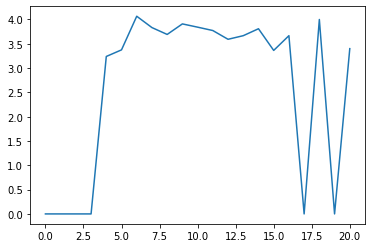

In [ ]:
age_ahome_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

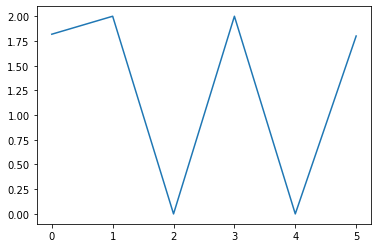

In [ ]:
plt.plot(age_ahome_list[15:]/age_count_list[15:])

In [ ]:
age_count_list

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        3, 37, 51, 51, 57, 21, 16,  7,  9,  0,  2,  3,  4,  3,  4])

### Submit To GitHub

In [ ]:
!git add .
!git commit -m "positive?"

whose behaviour will change in Git 2.0 with respect to paths you removed.
Paths like '.ipynb_checkpoints/Psychology Paper-checkpoint.ipynb' that are
removed from your working tree are ignored with this version of Git.

* 'git add --ignore-removal <pathspec>', which is the current default,
  ignores paths you removed from your working tree.

* 'git add --all <pathspec>' will let you also record the removals.

Run 'git status' to check the paths you removed from your working tree.

[master c679117] positive?
 2 files changed, 1118 insertions(+)
 create mode 100644 .ipynb_checkpoints/Psychology Paper Data Processing-checkpoint.ipynb
 create mode 100644 Psychology Paper Data Processing.ipynb


In [ ]:
xueyaxkouhlongkun nanshouxkouxueya xkou kunttbuygai qcaidiaode 